In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from datetime import timedelta

In [2]:
path="C:/Users/94772/Desktop/IOT project/model/water_tank_data_5_days.csv"
df = pd.read_csv(path)

In [5]:
# Force datetime conversion
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop any rows where conversion failed
df = df.dropna(subset=['timestamp'])


In [6]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day


In [7]:
#Prepare features and target
X = df[['hour', 'dayofweek', 'day']]
y = df['volume_used_liters']


In [8]:
#  Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# 8. Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Test MSE: 0.48


In [14]:
# Predict for the next day (24 hours)
next_day = pd.date_range(start=df['timestamp'].max() + pd.Timedelta(hours=1), periods=24, freq='H')
future_df = pd.DataFrame({
    'timestamp': next_day,
    'hour': next_day.hour,
    'dayofweek': next_day.dayofweek,
    'day': next_day.day
})
future_X = future_df[['hour', 'dayofweek', 'day']]
future_df['predicted_volume_liters'] = model.predict(future_X)


C:\Users\94772\AppData\Local\Temp\ipykernel_13220\1690408699.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  next_day = pd.date_range(start=df['timestamp'].max() + pd.Timedelta(hours=1), periods=24, freq='H')


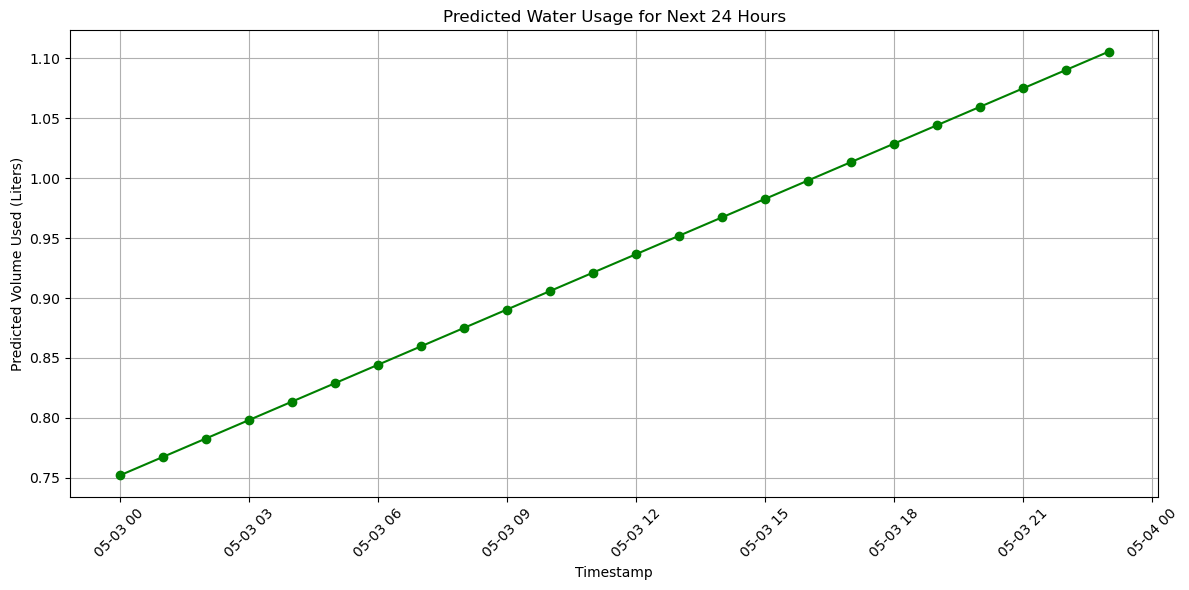

In [15]:
#Visualize prediction
plt.figure(figsize=(12, 6))
plt.plot(future_df['timestamp'], future_df['predicted_volume_liters'], marker='o', color='green')
plt.xticks(rotation=45)
plt.xlabel("Timestamp")
plt.ylabel("Predicted Volume Used (Liters)")
plt.title("Predicted Water Usage for Next 24 Hours")
plt.tight_layout()
plt.grid(True)
plt.show()